In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd
from scipy.stats import wasserstein_distance
from scipy.stats import energy_distance
from scipy.stats import ks_2samp

### Set Model-to-Evaluate

In [90]:
model = "review-representative-m25"

### Load Data

In [91]:
with open("../evaluated/{}.json".format(model),"r") as fp:
    data = json.load(fp)

# Calculations

## Generated vs Target

### Wasserstein

Version 1: Wasserstein(U,X) = 1.2305
Version 2: Wasserstein(U,X) = 0.3660
Version 3: Wasserstein(U,X) = 0.2111
Version 4: Wasserstein(U,X) = 0.1976
Version 5: Wasserstein(U,X) = 0.2313
Version 6: Wasserstein(U,X) = 0.2864
Version 7: Wasserstein(U,X) = 0.4906
Version 8: Wasserstein(U,X) = 0.6562
Version 9: Wasserstein(U,X) = 0.1684
Version 10: Wasserstein(U,X) = 0.3520
Version 11: Wasserstein(U,X) = 0.1759
Version 12: Wasserstein(U,X) = 0.4762
Version 13: Wasserstein(U,X) = 0.3191
Version 14: Wasserstein(U,X) = 0.4390
Version 15: Wasserstein(U,X) = 1.3562
Version 16: Wasserstein(U,X) = 0.2623
Version 17: Wasserstein(U,X) = 0.5579
Version 18: Wasserstein(U,X) = 0.8949
Version 19: Wasserstein(U,X) = 0.1388
Version 20: Wasserstein(U,X) = 0.2509
Version 21: Wasserstein(U,X) = 0.8252
Version 22: Wasserstein(U,X) = 0.2092
Version 23: Wasserstein(U,X) = 0.2959
Version 24: Wasserstein(U,X) = 0.7877
Version 25: Wasserstein(U,X) = 1.0218
Version 26: Wasserstein(U,X) = 0.7676
Version 27: Wasserste

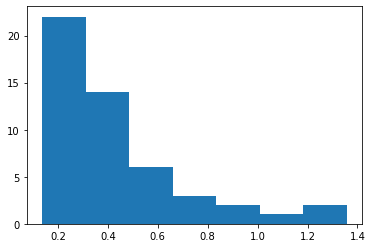

Mean of Wasserstein-Differences: 0.4268 | Std of Wasserstein-Differences: 0.2802
Maximum: 1.3562 | Minimum: 0.1373


In [92]:
ws = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    wsd = wasserstein_distance(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["data"]).ravel()
    )
    ws.append(wsd)
    print("Version {}: Wasserstein(U,X) = {:.4f}".format(variant, wsd))
plt.hist(ws, bins=int(np.sqrt(50)));plt.show()
print("Mean of Wasserstein-Differences: {:.4f} | Std of Wasserstein-Differences: {:.4f}".format(np.mean(ws), np.std(ws)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ws), np.min(ws)))

### Kolmogorov-Smirnov Statistic

Version 1: sup |P(X)-P(U)| = 0.2868
Version 2: sup |P(X)-P(U)| = 0.0783
Version 3: sup |P(X)-P(U)| = 0.0586
Version 4: sup |P(X)-P(U)| = 0.0848
Version 5: sup |P(X)-P(U)| = 0.0610
Version 6: sup |P(X)-P(U)| = 0.0731
Version 7: sup |P(X)-P(U)| = 0.1045
Version 8: sup |P(X)-P(U)| = 0.1612
Version 9: sup |P(X)-P(U)| = 0.0582
Version 10: sup |P(X)-P(U)| = 0.0999
Version 11: sup |P(X)-P(U)| = 0.0458
Version 12: sup |P(X)-P(U)| = 0.1029
Version 13: sup |P(X)-P(U)| = 0.0676
Version 14: sup |P(X)-P(U)| = 0.0878
Version 15: sup |P(X)-P(U)| = 0.3128
Version 16: sup |P(X)-P(U)| = 0.1097
Version 17: sup |P(X)-P(U)| = 0.1223
Version 18: sup |P(X)-P(U)| = 0.2100
Version 19: sup |P(X)-P(U)| = 0.0499
Version 20: sup |P(X)-P(U)| = 0.0504
Version 21: sup |P(X)-P(U)| = 0.1744
Version 22: sup |P(X)-P(U)| = 0.0706
Version 23: sup |P(X)-P(U)| = 0.0733
Version 24: sup |P(X)-P(U)| = 0.1785
Version 25: sup |P(X)-P(U)| = 0.2446
Version 26: sup |P(X)-P(U)| = 0.1638
Version 27: sup |P(X)-P(U)| = 0.1382
Version 28

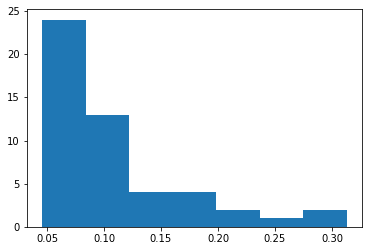

Mean of KSS: 0.1053 | Std of KSS: 0.0607
Maximum: 0.3128 | Minimum: 0.0458


In [93]:
ks = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    kss, _ = ks_2samp(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["data"]).ravel()
    )
    ks.append(kss)
    print("Version {}: sup |P(X)-P(U)| = {:.4f}".format(variant, kss))
plt.hist(ks, bins=int(np.sqrt(50)));plt.show()
print("Mean of KSS: {:.4f} | Std of KSS: {:.4f}".format(np.mean(ks), np.std(ks)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ks), np.min(ks)))

## Generated vs Training

### Wasserstein

Version 1: Wasserstein(U,X) = 1.2183
Version 2: Wasserstein(U,X) = 0.5413
Version 3: Wasserstein(U,X) = 0.3656
Version 4: Wasserstein(U,X) = 0.3368
Version 5: Wasserstein(U,X) = 0.4113
Version 6: Wasserstein(U,X) = 0.4322
Version 7: Wasserstein(U,X) = 0.6791
Version 8: Wasserstein(U,X) = 0.6530
Version 9: Wasserstein(U,X) = 0.2592
Version 10: Wasserstein(U,X) = 0.5559
Version 11: Wasserstein(U,X) = 0.2576
Version 12: Wasserstein(U,X) = 0.4821
Version 13: Wasserstein(U,X) = 0.3366
Version 14: Wasserstein(U,X) = 0.4537
Version 15: Wasserstein(U,X) = 1.5475
Version 16: Wasserstein(U,X) = 0.3942
Version 17: Wasserstein(U,X) = 0.7103
Version 18: Wasserstein(U,X) = 0.9020
Version 19: Wasserstein(U,X) = 0.2197
Version 20: Wasserstein(U,X) = 0.4162
Version 21: Wasserstein(U,X) = 1.0512
Version 22: Wasserstein(U,X) = 0.3404
Version 23: Wasserstein(U,X) = 0.4992
Version 24: Wasserstein(U,X) = 0.7757
Version 25: Wasserstein(U,X) = 1.0259
Version 26: Wasserstein(U,X) = 0.9789
Version 27: Wasserste

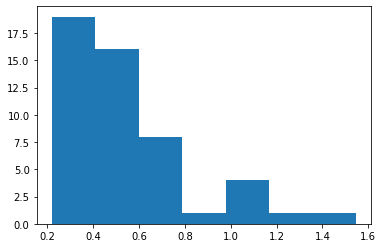

Mean of Wasserstein-Differences: 0.5404 | Std of Wasserstein-Differences: 0.2823
Maximum: 1.5475 | Minimum: 0.2197


In [94]:
ws_emp = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    wsd = wasserstein_distance(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["empiric"]).ravel()
    )
    ws_emp.append(wsd)
    print("Version {}: Wasserstein(U,X) = {:.4f}".format(variant, wsd))
plt.hist(ws_emp, bins=int(np.sqrt(50)));plt.show()
print("Mean of Wasserstein-Differences: {:.4f} | Std of Wasserstein-Differences: {:.4f}".format(np.mean(ws_emp), np.std(ws_emp)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ws_emp), np.min(ws_emp)))

### Kolmogorov-Smirnov Statistic

Version 1: sup |P(X)-P(U)| = 0.2894
Version 2: sup |P(X)-P(U)| = 0.1174
Version 3: sup |P(X)-P(U)| = 0.0980
Version 4: sup |P(X)-P(U)| = 0.0844
Version 5: sup |P(X)-P(U)| = 0.0980
Version 6: sup |P(X)-P(U)| = 0.1016
Version 7: sup |P(X)-P(U)| = 0.1444
Version 8: sup |P(X)-P(U)| = 0.1549
Version 9: sup |P(X)-P(U)| = 0.0564
Version 10: sup |P(X)-P(U)| = 0.1368
Version 11: sup |P(X)-P(U)| = 0.0746
Version 12: sup |P(X)-P(U)| = 0.1008
Version 13: sup |P(X)-P(U)| = 0.0860
Version 14: sup |P(X)-P(U)| = 0.0873
Version 15: sup |P(X)-P(U)| = 0.3518
Version 16: sup |P(X)-P(U)| = 0.1455
Version 17: sup |P(X)-P(U)| = 0.1591
Version 18: sup |P(X)-P(U)| = 0.2116
Version 19: sup |P(X)-P(U)| = 0.0535
Version 20: sup |P(X)-P(U)| = 0.0905
Version 21: sup |P(X)-P(U)| = 0.2147
Version 22: sup |P(X)-P(U)| = 0.1084
Version 23: sup |P(X)-P(U)| = 0.1113
Version 24: sup |P(X)-P(U)| = 0.1779
Version 25: sup |P(X)-P(U)| = 0.2455
Version 26: sup |P(X)-P(U)| = 0.2008
Version 27: sup |P(X)-P(U)| = 0.1782
Version 28

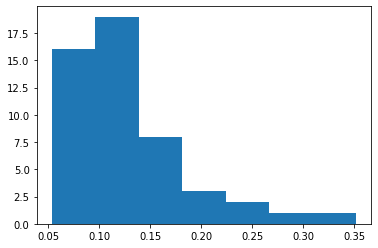

Mean of KSS: 0.1271 | Std of KSS: 0.0620
Maximum: 0.3518 | Minimum: 0.0535


In [95]:
ks_emp = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    kss, _ = ks_2samp(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["empiric"]).ravel()
    )
    ks_emp.append(kss)
    print("Version {}: sup |P(X)-P(U)| = {:.4f}".format(variant, kss))
plt.hist(ks_emp, bins=int(np.sqrt(50)));plt.show()
print("Mean of KSS: {:.4f} | Std of KSS: {:.4f}".format(np.mean(ks_emp), np.std(ks_emp)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ks_emp), np.min(ks_emp)))

## Training vs Target

Version 1: Wasserstein(U,X) = 0.2443
Version 2: Wasserstein(U,X) = 0.2420
Version 3: Wasserstein(U,X) = 0.2405
Version 4: Wasserstein(U,X) = 0.2588
Version 5: Wasserstein(U,X) = 0.2572
Version 6: Wasserstein(U,X) = 0.2384
Version 7: Wasserstein(U,X) = 0.2444
Version 8: Wasserstein(U,X) = 0.2627
Version 9: Wasserstein(U,X) = 0.2696
Version 10: Wasserstein(U,X) = 0.2422
Version 11: Wasserstein(U,X) = 0.2222
Version 12: Wasserstein(U,X) = 0.2387
Version 13: Wasserstein(U,X) = 0.2514
Version 14: Wasserstein(U,X) = 0.2425
Version 15: Wasserstein(U,X) = 0.2286
Version 16: Wasserstein(U,X) = 0.2145
Version 17: Wasserstein(U,X) = 0.2189
Version 18: Wasserstein(U,X) = 0.2346
Version 19: Wasserstein(U,X) = 0.2248
Version 20: Wasserstein(U,X) = 0.2403
Version 21: Wasserstein(U,X) = 0.2539
Version 22: Wasserstein(U,X) = 0.2546
Version 23: Wasserstein(U,X) = 0.2659
Version 24: Wasserstein(U,X) = 0.2414
Version 25: Wasserstein(U,X) = 0.2358
Version 26: Wasserstein(U,X) = 0.2267
Version 27: Wasserste

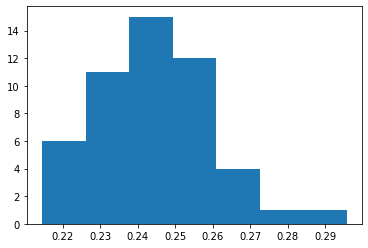

Mean of Wasserstein-Differences: 0.2440 | Std of Wasserstein-Differences: 0.0158
Maximum: 0.2957 | Minimum: 0.2145


In [96]:
ws_emp_t = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    wsd = wasserstein_distance(
        np.array(data[variant]["Samples"]["data"]).ravel(),
        np.array(data[variant]["Samples"]["empiric"]).ravel()
    )
    ws_emp_t.append(wsd)
    print("Version {}: Wasserstein(U,X) = {:.4f}".format(variant, wsd))
plt.hist(ws_emp_t, bins=int(np.sqrt(50)));plt.show()
print("Mean of Wasserstein-Differences: {:.4f} | Std of Wasserstein-Differences: {:.4f}".format(np.mean(ws_emp_t), np.std(ws_emp_t)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ws_emp_t), np.min(ws_emp_t)))

Version 1: sup |P(X)-P(U)| = 0.0406
Version 2: sup |P(X)-P(U)| = 0.0416
Version 3: sup |P(X)-P(U)| = 0.0413
Version 4: sup |P(X)-P(U)| = 0.0421
Version 5: sup |P(X)-P(U)| = 0.0430
Version 6: sup |P(X)-P(U)| = 0.0405
Version 7: sup |P(X)-P(U)| = 0.0428
Version 8: sup |P(X)-P(U)| = 0.0447
Version 9: sup |P(X)-P(U)| = 0.0433
Version 10: sup |P(X)-P(U)| = 0.0411
Version 11: sup |P(X)-P(U)| = 0.0400
Version 12: sup |P(X)-P(U)| = 0.0416
Version 13: sup |P(X)-P(U)| = 0.0422
Version 14: sup |P(X)-P(U)| = 0.0408
Version 15: sup |P(X)-P(U)| = 0.0434
Version 16: sup |P(X)-P(U)| = 0.0400
Version 17: sup |P(X)-P(U)| = 0.0401
Version 18: sup |P(X)-P(U)| = 0.0410
Version 19: sup |P(X)-P(U)| = 0.0404
Version 20: sup |P(X)-P(U)| = 0.0438
Version 21: sup |P(X)-P(U)| = 0.0440
Version 22: sup |P(X)-P(U)| = 0.0432
Version 23: sup |P(X)-P(U)| = 0.0428
Version 24: sup |P(X)-P(U)| = 0.0412
Version 25: sup |P(X)-P(U)| = 0.0410
Version 26: sup |P(X)-P(U)| = 0.0413
Version 27: sup |P(X)-P(U)| = 0.0413
Version 28

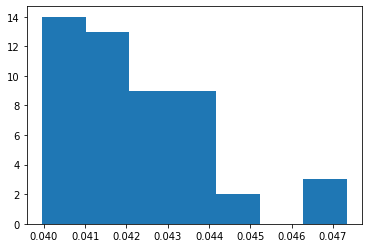

Mean of KSS: 0.0421 | Std of KSS: 0.0018
Maximum: 0.0473 | Minimum: 0.0400


In [97]:
ks_emp_t = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    kss, _ = ks_2samp(
        np.array(data[variant]["Samples"]["data"]).ravel(),
        np.array(data[variant]["Samples"]["empiric"]).ravel()
    )
    ks_emp_t.append(kss)
    print("Version {}: sup |P(X)-P(U)| = {:.4f}".format(variant, kss))
plt.hist(ks_emp_t, bins=int(np.sqrt(50)));plt.show()
print("Mean of KSS: {:.4f} | Std of KSS: {:.4f}".format(np.mean(ks_emp_t), np.std(ks_emp_t)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ks_emp_t), np.min(ks_emp_t)))

In [98]:
c_ks = 0
c_ws = 0
for i in range(len(ks)):
    if ks[i] < ks_emp_t[i]:
        c_ks += 1
    if ws[i] < ws_emp_t[i]:
        c_ws += 1
c_ks, c_ws

(0, 16)

<AxesSubplot:ylabel='Density'>

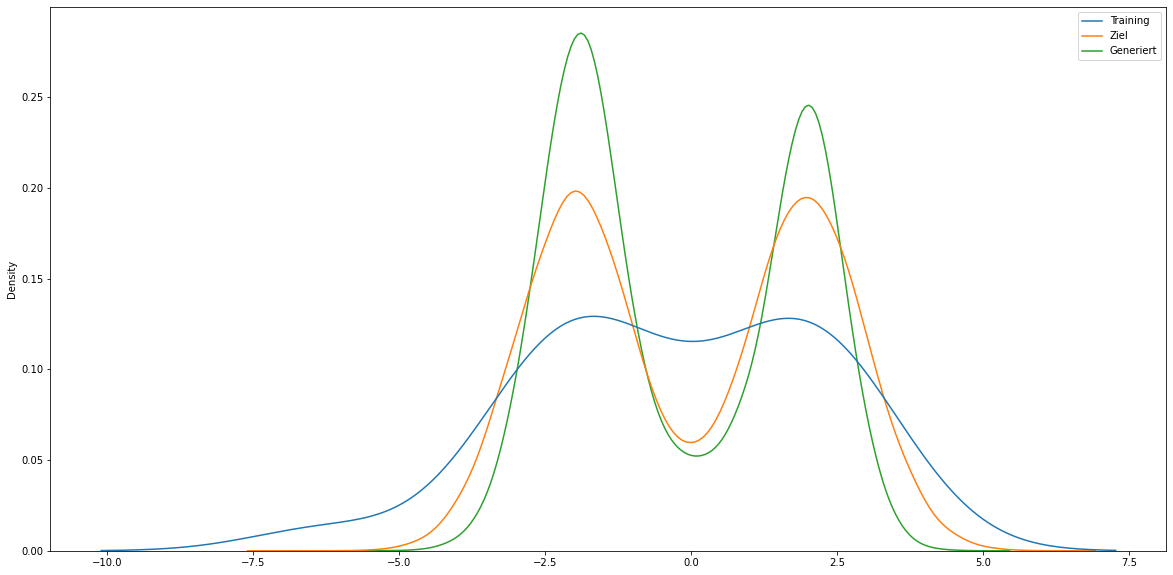

In [99]:
variant = "13"
plt.figure(figsize=(20,10))
sns_data = dict(
    Training=np.array(data[variant]["Samples"]["empiric"]).ravel(),
    Ziel=np.array(data[variant]["Samples"]["data"]).ravel(),
    Generiert=np.array(data[variant]["Samples"]["generator"]).ravel(),
)
sns.kdeplot(
    data=sns_data,
    common_norm=False
)

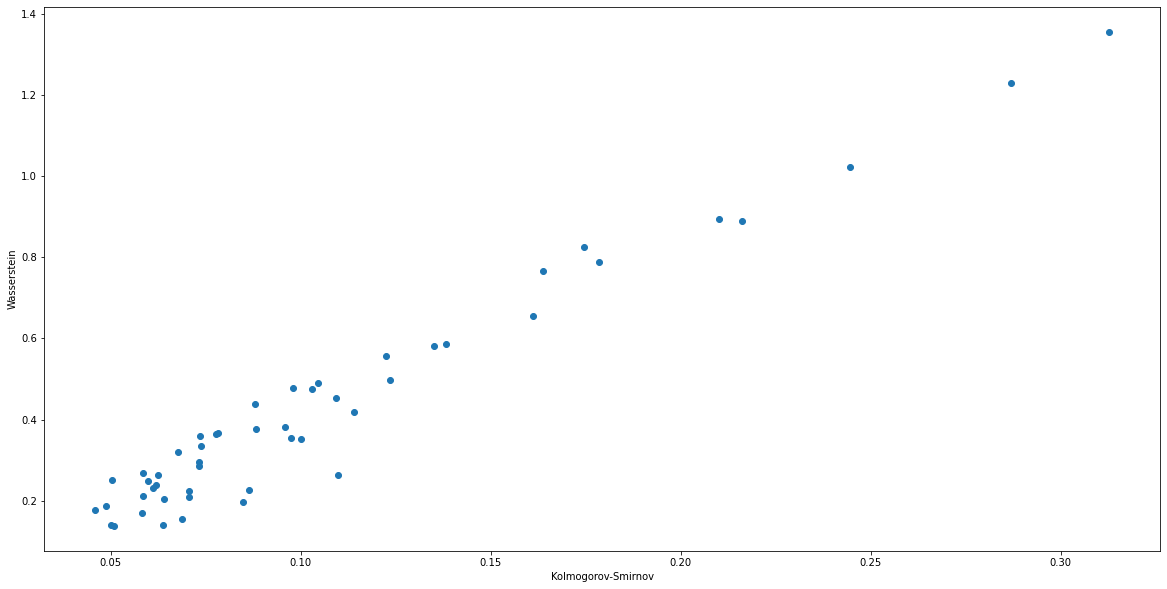

In [100]:
plt.figure(figsize=(20,10))
plt.xlabel("Kolmogorov-Smirnov")
plt.ylabel("Wasserstein")
plt.scatter(ks, ws)